In [100]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.manifold import Isomap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

random_state = 2312675

In [39]:
df = pd.read_csv("BreastCancerdata.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [41]:
# Remove null column
df = df.drop("Unnamed: 32", axis=1)

In [42]:
X, y = df.drop("diagnosis", axis=1), df["diagnosis"]

# Define train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=random_state)

In [43]:
# PCA Method
transformer = PCA(n_components=10)
X_PCA = transformer.fit_transform(X)
X_trainPCA, X_testPCA, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, shuffle=True, random_state=random_state)

In [44]:
# SVC Method
transformer = SVD(n_components=10)
X_SVD = transformer.fit_transform(X)
X_trainSVD, X_testSVD, y_train, y_test = train_test_split(X_SVD, y, test_size=0.2, shuffle=True, random_state=random_state)

In [45]:
# Iso Method
transformer = Isomap(n_components=10)
X_Iso = transformer.fit_transform(X)
X_trainIso, X_testIso, y_train, y_test = train_test_split(X_Iso, y, test_size=0.2, shuffle=True, random_state=random_state)

In [85]:
%%time
model = LogisticRegression(solver="liblinear", multi_class="auto")
NoReduction_Model = model.fit(X_train, y_train)

Wall time: 3.99 ms


In [80]:
%%time
model = LogisticRegression(solver="liblinear", multi_class="auto")
PCA_Model = model.fit(X_trainPCA, y_train)

Wall time: 1.97 ms


In [74]:
%%time
model = LogisticRegression(solver="liblinear", multi_class="auto")
SVD_Model = model.fit(X_trainSVD, y_train)

Wall time: 997 µs


In [78]:
%%time
model = LogisticRegression(solver="liblinear", multi_class="auto")
Iso_Model = model.fit(X_trainIso, y_train)

Wall time: 1.99 ms


In [91]:
y_pred = NoReduction_Model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
NoReduction_Acc = accuracy * 100.0
print('>%s: %.3f%s' % ("NoReduction", NoReduction_Acc, "%"))


y_pred = PCA_Model.predict(X_testPCA)
accuracy = accuracy_score(y_test, y_pred)
PCA_Acc = accuracy * 100.0
print('>%s: %.3f%s' % ("PCA", PCA_Acc, "%"))


y_pred = SVD_Model.predict(X_testSVD)
accuracy = accuracy_score(y_test, y_pred)
SVD_Acc = accuracy * 100.0
print('>%s: %.3f%s' % ("SVD", SVD_Acc, "%"))


y_pred = Iso_Model.predict(X_testIso)
accuracy = accuracy_score(y_test, y_pred)
Iso_Acc = accuracy * 100.0
print('>%s: %.3f%s' % ("Isomap", Iso_Acc, "%"))

>NoReduction: 44.737%
>PCA: 91.228%
>SVD: 44.737%
>Isomap: 56.140%


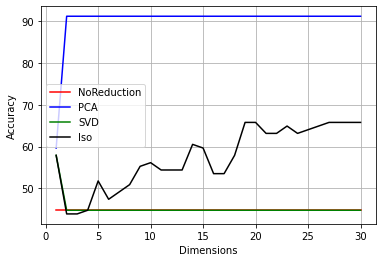

In [112]:
scores_NoReduction = []
scores_PCA = []
scores_SVD = []
scores_Iso = []
ys = []

# Big test
for i in reversed(range(1, len(df.columns)-1)):
    # print("\nDimensions:", i)

    # PCA Transformer init
    transformer = PCA(n_components=i)
    X_PCA = transformer.fit_transform(X)
    X_trainPCA, X_testPCA, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, shuffle=True, random_state=random_state)

    # SVC Transformer init
    transformer = SVD(n_components=i)
    X_SVD = transformer.fit_transform(X)
    X_trainSVD, X_testSVD, y_train, y_test = train_test_split(X_SVD, y, test_size=0.2, shuffle=True, random_state=random_state)

    # Iso Transformer init
    transformer = Isomap(n_components=i)
    X_Iso = transformer.fit_transform(X)
    X_trainIso, X_testIso, y_train, y_test = train_test_split(X_Iso, y, test_size=0.2, shuffle=True, random_state=random_state)


    # Fit no reduction
    model = LogisticRegression(solver="liblinear", multi_class="auto")
    NoReduction_Model = model.fit(X_train, y_train)

    # Fit PCA
    model = LogisticRegression(solver="liblinear", multi_class="auto")
    PCA_Model = model.fit(X_trainPCA, y_train)

    # Fit SVD
    model = LogisticRegression(solver="liblinear", multi_class="auto")
    SVD_Model = model.fit(X_trainSVD, y_train)

    # Fit Iso
    model = LogisticRegression(solver="liblinear", multi_class="auto")
    Iso_Model = model.fit(X_trainIso, y_train)


    # No reduction predictions
    y_pred = NoReduction_Model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    NoReduction_Acc = accuracy * 100.0
    # print('>%s: %.3f%s' % ("NoReduction", NoReduction_Acc, "%"))

    # PCA predictions
    y_pred = PCA_Model.predict(X_testPCA)
    accuracy = accuracy_score(y_test, y_pred)
    PCA_Acc = accuracy * 100.0
    # print('>%s: %.3f%s' % ("PCA", PCA_Acc, "%"))

    # SVD predictions
    y_pred = SVD_Model.predict(X_testSVD)
    accuracy = accuracy_score(y_test, y_pred)
    SVD_Acc = accuracy * 100.0
    # print('>%s: %.3f%s' % ("SVD", SVD_Acc, "%"))

    # Iso predictions
    y_pred = Iso_Model.predict(X_testIso)
    accuracy = accuracy_score(y_test, y_pred)
    Iso_Acc = accuracy * 100.0
    # print('>%s: %.3f%s' % ("Isomap", Iso_Acc, "%"))

    ys.append(i)
    scores_NoReduction.append(NoReduction_Acc)
    scores_PCA.append(PCA_Acc)
    scores_SVD.append(SVD_Acc)
    scores_Iso.append(Iso_Acc)

plt.plot(ys, scores_NoReduction, label="NoReduction", color="red")
plt.plot(ys, scores_PCA, label="PCA", color="blue")
plt.plot(ys, scores_SVD, label="SVD", color="green")
plt.plot(ys, scores_Iso, label="Iso", color="black")
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("Dimensions")
plt.legend()